# Setup 

## Imports

In [317]:
import networkx as nx
import numpy as np
import numpy.linalg as lin
from __future__ import annotations
import matplotlib.pyplot as plt
from  rational import RationalF as Ratio

In [372]:
def make_core_periphy(core_size, branching_factor):
    n = core_size * (1 + branching_factor)
    mat = np.zeros((n,n))
    for i in range(core_size):
        for j in range(core_size):
            if(i == j): continue
            mat[i,j] = 1
    for i in range(core_size, n):
        parent = (i - core_size) // branching_factor 
        mat[parent, i] = 1
    return mat

    return mat
def specNorm(A: np.matrix) -> float:
    return lin.norm(A, ord=2)


def guessF(k, l):
    return Ratio([1, k], [1, -2*(l-1), -k] )

def guessG(k,l):
    return Ratio([1, 3 - 2*l], [1, -2*(l-1), -k])

def guessCons(a, c, k, rho, l, vc, vp): 
    t1 = 1 + 2*k*rho 
    t2 = vc + 2*k*rho*vp
    t2 = rho * t2
    b = 1 - 2*(l-1)*rho
    res = t1 - t2 
    res = res / b 
    return ( (a-c)/2) * res 

a = 5
c = 4

In [373]:
a = 4
c = 2
k = 25
l = 30
m = make_core_periphy(l, k)
n = len(m)
rho = 0.9 / specNorm(m + m.T)


# Check for sum of walks

In [374]:
def centralty(A: np.matrix, rho: float) -> np.matrix:
    """

    Parameters
    ----------
    A : np matrix
    rho : network effect

    Returns
    -------
    Centrality vector as described in paper
    """
    n = A.shape[0]
    ident = np.eye(n, n)
    ones = np.ones((n, 1))
    ApA = A + A.T
    central = lin.inv(ident - (rho * ApA))
    central = central @ ones  
    return central
factor  = rho 
f = guessF(k,l)
g = guessG(k,l)
f_val = f.eval(factor)
g_val = g.eval(factor)
central = centralty(m, rho)
actual_core = central[0]
actual_per = central[-1]
print(f_val - actual_core, g_val - actual_per)

[4.26325641e-14] [-3.77475828e-15]


# Scaled walks
We want $\frac{a-c}{2}\rho * (G - G^T) v $ not just v

In [375]:
fraction = ((a-c)/2) * rho
graph_part =  fraction * (m - m.T) @ central 
graph_core =  graph_part[0,0]
graph_per = graph_part[-1,0]
guess_core = fraction * k * g_val 
guess_per = - fraction * f_val 
print(graph_core - guess_core, graph_per - guess_per)

-7.494005416219807e-15 7.771561172376096e-16


# Full Price vectors

In [376]:
def price_vector(a, c, rho, G):
    n = len(G)
    frac1 = (a+c)/2
    frac2 = rho * ( (a-c)/2)
    return (frac1 * np.ones((n,1))) + (frac2 * (G - G.T) @ centralty(G, rho))
 

price = price_vector(a, c, rho, m)
price_core = price[0,0]
price_per = price[-1,0]
pguess_core = ((a+c)/2) + guess_core 
pguess_per = ((a+c)/2) + guess_per 
print(price_core - pguess_core, price_per - pguess_per)


-7.549516567451064e-15 8.881784197001252e-16


# Consumption 



In [377]:
def consumption(n, rho, a, c, G):
    p = price_vector(a, c, rho, G)
    v = a * np.ones((n,1))
    v = v - p 
    mat = lin.inv(np.eye(n,n) - 2 * rho * G  )
    return 0.5 * mat @ v 

consu = consumption(n, rho, a, c, m)
consu_core = consu[0,0]
consu_per = consu[-1,0]

vc = k * g_val 
vp = - f_val 
guess_consu = (1 + 2*k*rho)/(1- 2*(l-1)*rho)
guess_consu2 = rho * (vc +  2*k*rho*vp)/(1 - 2*(l-1)*rho)
guess_consu_core = ((a-c)/4) * (guess_consu - guess_consu2)
guess_consu_per = ((a-c)/4) * ( 1 + rho*f_val)
print(consu_core - guess_consu_core , consu_per - guess_consu_per)



4.618527782440651e-14 -4.440892098500626e-16


# Profits

## Profit from each core and each peripheral node

In [378]:
profit_core = (price_core - c) * consu_core
profit_per = (price_per - c) * consu_per
profit_per_guess = ((a-c)*(a-c)/8) * (1- (rho * f_val)**2)
vc = k * g_val 
vp = - f_val 
guess_x = (1 + 2*k*rho + 2*k*rho*rho*f_val - rho*k*g_val)/(1 - 2*(l-1)*rho)
profit_core_guess = ((a-c)**2/8) * ( 1 + rho*k*g_val ) * guess_x
print(profit_per_guess - profit_per)
print(profit_core -profit_core_guess)


-1.6653345369377348e-16
1.5987211554602254e-14


In [379]:
# Total profit 
guess_profit = l * profit_core_guess + k*l * profit_per_guess
print ((price - c*np.ones((n,1))).T @ consu)
guess_profit

[[660.88696471]]


660.8869647056076

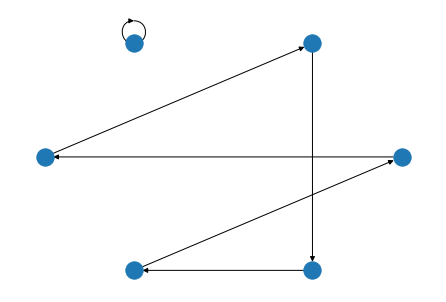

In [1]:
    import networkx as nx 
    G = nx.DiGraph([(0,1), (1,2), (2,3), (3,4),(4,5), (5,0)] )
    degree = [1,1,1,1,1,1] 
    #This is random, different results each time it is called
    H = nx.directed_configuration_model(degree, degree)
    nx.draw(H, pos=nx.circular_layout(H))


In [2]:
 #This is random, different results each time it is called
#H = nx.directed_configuration_model(degree, degree)